In [1]:
# Importing neccesary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Function to convert image into binary form according to the threshold
def binarize(image_to_transform, threshold):
    # Converting to grayscale
    output_image = image_to_transform.convert("L")
    for x in range(output_image.width):
        for y in range(output_image.height):
            if output_image.getpixel((x, y)) < threshold:  
                output_image.putpixel((x, y), 0)
            else:
                output_image.putpixel((x, y), 255)
    return output_image

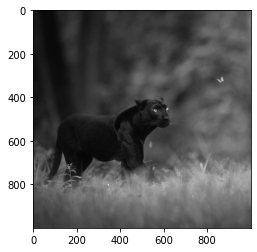

In [3]:
# Image to be watermarked
img = Image.open('ab.png')
# Resize image
newsize=(1000,1000)
img=img.resize(newsize)
# Converting to grayscale
img = img.convert("L")
plt.imshow(img,cmap='gray')

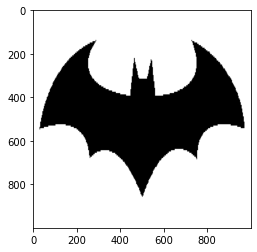

In [4]:
# Watermarking Image
markImg=Image.open('ab1.jpg')
# Resize image
newsize=(1000,1000)
markImg=markImg.resize(newsize)
# Converting to binary form ( All pixels above 128 will be converted to 255[white] and pixel with values below 128 will be converted to 0[black])
markImg=binarize(markImg,128)
plt.imshow(markImg,cmap='gray')

In [5]:
# Flatten both images and convert it into numpy array
array = np.array(list(img.getdata()))
array1 = np.array(list(markImg.getdata()))

# Watermarking original image by appending 0 or 1 to the original image according to the pixel intensity of the watermarking image
for p in range(1000000):
    bin1=bin(array[p])[2:-1]
    x=bin(array1[p])[2]
    bin1 += x
    array[p]=int(bin1, 2)

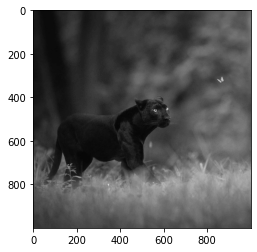

In [6]:
# Converting watermarked numpy array back to image
array=array.reshape(1000,1000)
enc_img = Image.fromarray(array.astype('uint8'), img.mode)
plt.imshow(enc_img,cmap='gray')

In [7]:
enc_img.show()

In [8]:
# Extracting watermark from watermarked image
array2 = np.array(list(enc_img.getdata()))
for p in range(1000000):
    if bin(array2[p])[-1]=='1': array2[p]=255
    else: array2[p]=0

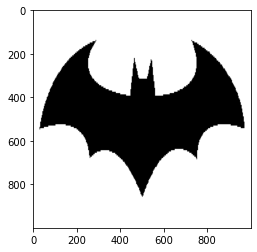

In [9]:
# Display extracted watermark
array2=array2.reshape(1000,1000)
enc_img1 = Image.fromarray(array2.astype('uint8'), markImg.mode)
plt.imshow(enc_img1,cmap='gray')

In [10]:
enc_img1.show()